## Title
Autoencoders on Iris data

## Description :
The goal of this exercise is to visualize the latent-space for the autoencoder trained on the IRIS dataset. 

<img src="../fig/fig6.png" style="width: 500px;">

## Instructions:
- Load the IRIS dataset with the `load_iris()` function provided by keras. 
- Load the predictors as the variable `X` and the targets as the variable `y`.
- Make a basic autoencoder model (Encoder - Decoder) as follows:
    - Map encoder to a latent (hidden) space - input dimension is 4 and output dimension is 2.
    - Use the decoder to reconstruct - input dimension is 2 and output dimension is 4.
- Make the final `autoencoder` model with the help of the <a href="https://www.tensorflow.org/guide/keras/functional" target="_blank">keras functional API</a> 
- Compile the model with an appropriate `optimizer` and `loss`.
- Train the model for several epochs and save the training into a variable `history`.
- Plot the `loss` and `validation_loss` over the epochs.
- Finally plot the latent space representation along with the clusters using the `plot3clusters()` function. This plot will look similar to the one given above.


## Hints: 

<a href="https://keras.io/guides/sequential_model/" target="_blank">keras.compile()</a> Compiles the layers into a network.

<a href="https://keras.io/guides/sequential_model/" target="_blank">keras.Sequential()</a> Models a sequential neural network.

<a href="https://keras.io/api/layers/core_layers/dense/" target="_blank">keras.Dense()</a> A regular densely-connected NN layer.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Input" target="_blank">tf.keras.Input()</a> Used to instantiate a Keras tensor.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf

2023-08-31 16:03:33.556102: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 16:03:33.582979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 16:03:33.583659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 16:03:34.217462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

/tmp/ipykernel_32033/4149627420.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [7]:
#Load Iris Dataset 
iris = load_iris()

# Get the predictor and response variables
X = iris.data
y = iris.target

# Get the Iris label names
target_names = iris.target_names
print(X.shape, y.shape) 

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

(150, 4) (150,)


In [3]:
# Helper function to plot the data as clusters 
# based on the iris species label

def plot3clusters(X, title, vtitle):
    plt.figure()
    
    # Select the colours of the clusters
    colors = ['#A43F98', '#5358E0', '#DE0202']
    lw = 2
    plt.figure(figsize=(9,7));
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw, label=target_name);
   
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title);
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show();

In [5]:
### edTest(test_check_ae) ###

# Create an AE and fit it with our data using 2 neurons in the dense layer 
# using keras' functional API

# Get the number of data samples i.e. the number of columns
input_dim = 4
output_dim = 4

# Specify the number of neurons for the dense layers
encoding_dim = 2

# Specify the input layer
input_features = tf.keras.Input(shape = (input_dim,))

# Add a denser layer as the encode layer following the input layer 
# with 2 neurons and no activation function
encoded = tf.keras.layers.Dense(units = encoding_dim)(input_features)

# Add a denser layer as the decode layer following the encode layer 
# with output_dim as a parameter and no activation function
decoded = tf.keras.layers.Dense(units = output_dim)(encoded)

# Create an autoencoder model with
# input as input_features and outputs decoded
autoencoder = tf.keras.Model(input_features, decoded)

# Complile the autoencoder model
autoencoder.compile(loss = "mse", metrics = ["accuracy"], optimizer = "nadam")

# View the summary of the autoencoder
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


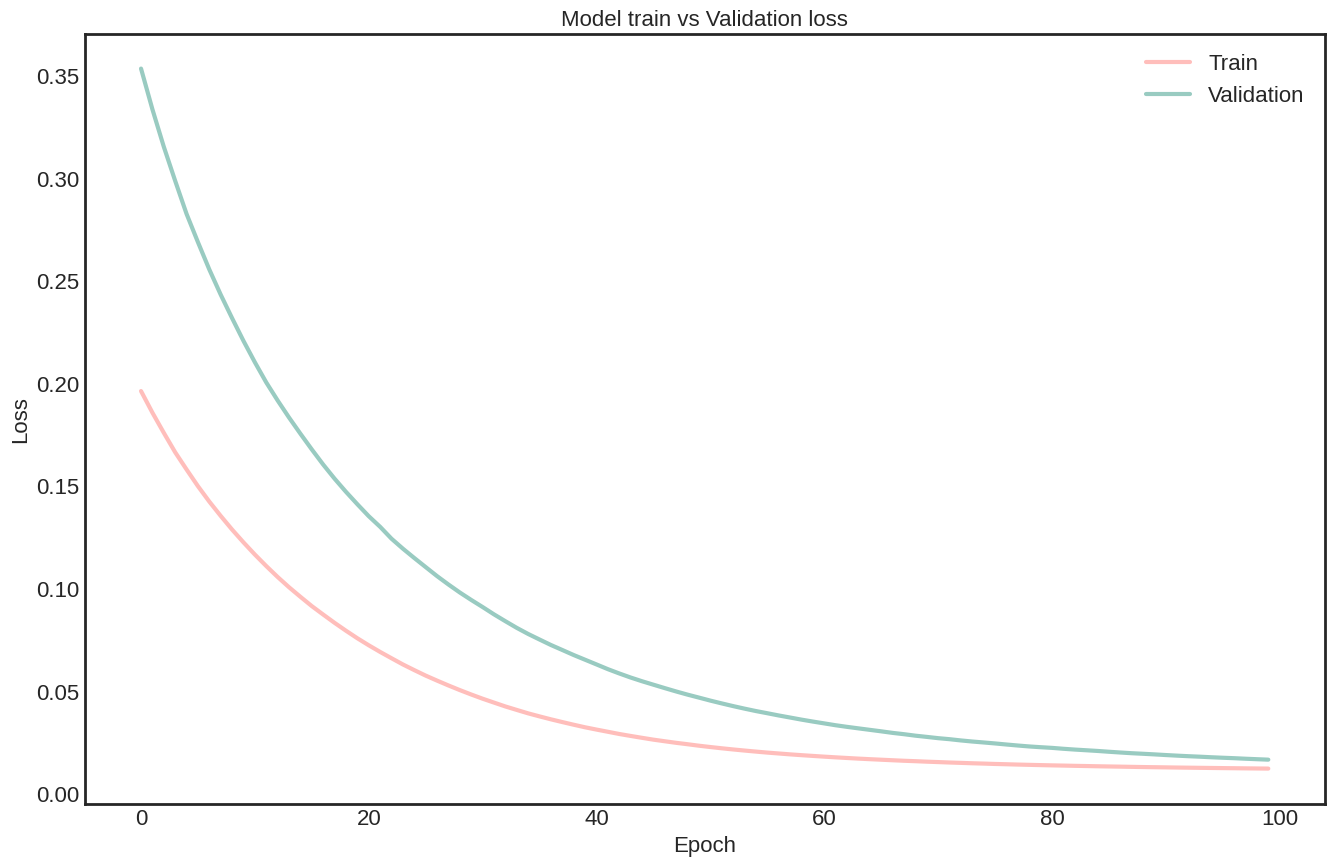

In [9]:
# Use the helper function to plot the model history

# Get the history of the model to plot
history = autoencoder.fit(X_scaled, X_scaled,
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()


5/5 [==============================] - 0s 629us/step


<Figure size 1600x1000 with 0 Axes>

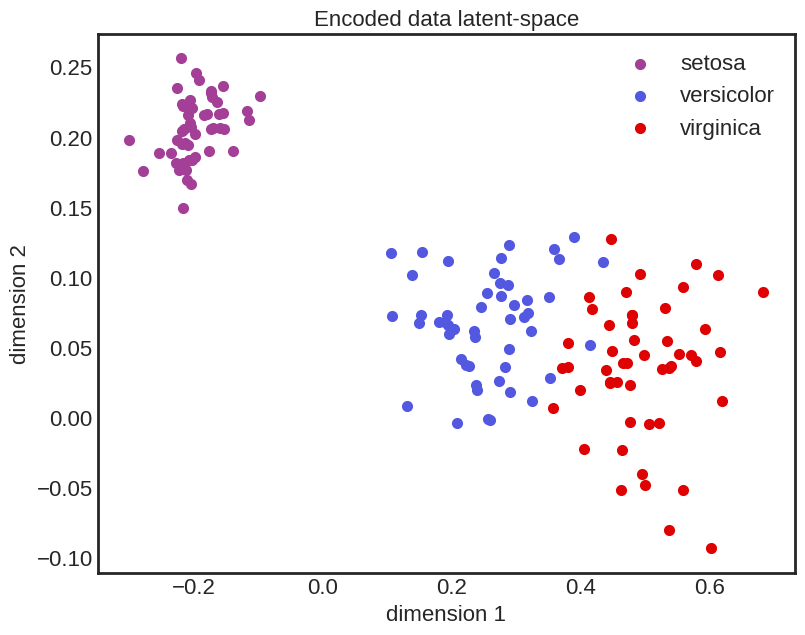

In [10]:
# Create a model which has input as input_features and 
# output as encoded
encoder = tf.keras.Model(input_features, encoded)

# Predict on the entire data using the encoder model, 
# remember to use X_scaled 
encoded_data = encoder.predict(X_scaled)

# Call the function plot3clusters to plot the predicted data 
# using the encoded layer
plot3clusters(encoded_data, 'Encoded data latent-space', 'dimension ');

# Mindchow 🍲
Go back and train for more epochs. Does your latent-space distinguish between the plant types better?

*Your answer here*